In [41]:
import os
from os.path import expanduser
import numpy as np
home_dir = expanduser("~")
result_dir = 'results/'
import datetime
import codecs, json
import math
import time
import random
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
np.random.seed(999)
random.seed(999)

In [42]:
save_figs = 1

# Load CPU data 

In [43]:
### Load the benchmark
name_of_cpu_bench = 'CPU_batch_size_2018-04-23'

### Load the CPU json file
with open(result_dir + name_of_cpu_bench + '.json', 'r') as f:
    json_data_cpu = json.load(f)
f.close()

In [44]:
time_array_cpu = np.array(json_data_cpu[0])
json_info_dict_cpu = json_data_cpu[1]
print(time_array_cpu)
print(json_info_dict_cpu)

[29.83184911 19.83334237 17.35304942 12.13837848  6.21366767  4.6089822
  4.01101106]
{'On_CPU_only': True, 'number_of_epochs': [1000.0], 'training_set_size': [300000.0], 'input_features': ['Halo_mass', 'Halo_mass_peak', 'Concentration', 'Halo_spin'], 'output_features': ['Stellar_mass'], 'tested_parameter': 'batch_size', 'tested_values': [1000.0, 3000.0, 6000.0, 10000.0, 30000.0, 60000.0, 100000.0], 'batch_size': [10000.0], 'nr_of_layers': [10], 'activation_function': 'tanh', 'neurons_per_layer': [10]}


In [45]:
if json_info_dict_cpu['tested_parameter'] == 'batch_size': 
    param_string_cpu = 'nr of Layers: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (json_info_dict_cpu['nr_of_layers'][0], json_info_dict_cpu['activation_function'], 
    json_info_dict_cpu['neurons_per_layer'][0], json_info_dict_cpu['training_set_size'][0])
elif json_info_dict_cpu['tested_parameter'] == 'nLayers': 
    param_string_cpu = 'batch size: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_cpu['batch_size'][0], json_info_dict_cpu['activation_function'], 
    json_info_dict_cpu['neurons_per_layer'][0], json_info_dict_cpu['training_set_size'][0])
elif json_info_dict_cpu['tested_parameter'] == 'neurons_per_layer': 
    param_string_cpu = 'nr of Layers: %d, activation function: %s, batch size: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_cpu['nr_of_layers'][0], json_info_dict_cpu['activation_function'], 
    json_info_dict_cpu['batch_size'][0], json_info_dict_cpu['training_set_size'][0])
elif json_info_dict_cpu['tested_parameter'] == 'actfun': 
    param_string_cpu = 'nr of Layers: %d, batch size: %d, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_cpu['nr_of_layers'][0], json_info_dict_cpu['batch_size'][0], 
    json_info_dict_cpu['neurons_per_layer'][0], json_info_dict_cpu['training_set_size'][0])

# Load GPU data

In [57]:
### Load the benchmark
name_of_gpu_bench = 'GPU_batch_size_2018-04-23'
### Load the GPU json file
with open(result_dir + name_of_gpu_bench + '.json', 'r') as f:
    json_data_gpu = json.load(f)
f.close()

In [58]:
time_array_gpu = np.array(json_data_gpu[0])
json_info_dict_gpu = json_data_gpu[1]
print(time_array_gpu)
print(json_info_dict_gpu)

[65.61076821 23.5042517  13.48063096  9.03407786  4.75424581  3.40690109
  2.87007747]
{'On_CPU_only': False, 'number_of_epochs': [1000.0], 'training_set_size': [300000.0], 'input_features': ['Halo_mass', 'Halo_mass_peak', 'Concentration', 'Halo_spin'], 'output_features': ['Stellar_mass'], 'tested_parameter': 'batch_size', 'tested_values': [1000.0, 3000.0, 6000.0, 10000.0, 30000.0, 60000.0, 100000.0], 'batch_size': [10000.0], 'nr_of_layers': [10], 'activation_function': 'tanh', 'neurons_per_layer': [10]}


In [59]:
if json_info_dict_gpu['tested_parameter'] == 'batch_size': 
    param_string_gpu = 'nr of Layers: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (json_info_dict_gpu['nr_of_layers'][0], json_info_dict_gpu['activation_function'], 
    json_info_dict_gpu['neurons_per_layer'][0], json_info_dict_gpu['training_set_size'][0])
elif json_info_dict_gpu['tested_parameter'] == 'nLayers': 
    param_string_gpu = 'batch size: %d, activation function: %s, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_gpu['batch_size'][0], json_info_dict_gpu['activation_function'], 
    json_info_dict_gpu['neurons_per_layer'][0], json_info_dict_gpu['training_set_size'][0])
elif json_info_dict_gpu['tested_parameter'] == 'neurons_per_layer': 
    param_string_gpu = 'nr of Layers: %d, activation function: %s, batch size: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_gpu['nr_of_layers'][0], json_info_dict_gpu['activation_function'], 
    json_info_dict_gpu['batch_size'][0], json_info_dict_gpu['training_set_size'][0])
elif json_info_dict_gpu['tested_parameter'] == 'actfun': 
    param_string_gpu = 'nr of Layers: %d, batch size: %d, neurons per layer: %d\nnumber of training samples: %.1e'\
    % (
    json_info_dict_gpu['nr_of_layers'][0], json_info_dict_gpu['batch_size'][0], 
    json_info_dict_gpu['neurons_per_layer'][0], json_info_dict_gpu['training_set_size'][0])

# Plot the performance from one benchmark

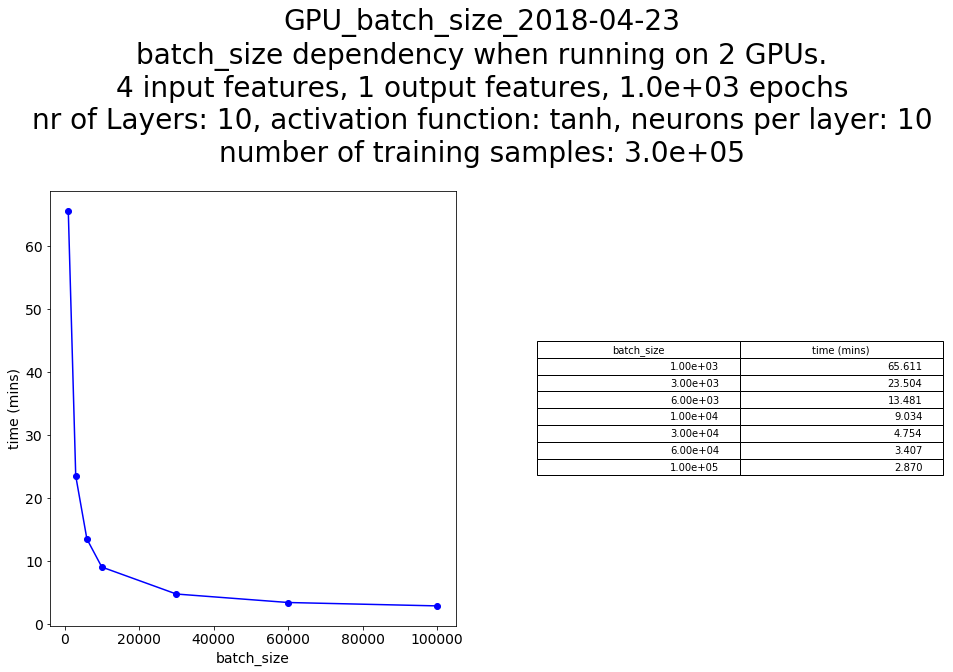

In [61]:
### Choose which benchmark to look at
bench = 'GPU' # 'GPU' or 'CPU'

if bench == 'GPU':
    time_array = time_array_gpu
    json_info_dict = json_info_dict_gpu
    name_of_benchmark = name_of_gpu_bench
    json_data = json_data_gpu
    param_string = param_string_gpu
elif bench == 'CPU':
    time_array = time_array_cpu
    json_info_dict = json_info_dict_cpu
    name_of_benchmark = name_of_cpu_bench
    json_data = json_data_cpu
    param_string = param_string_cpu


plot_chars = {'batch_size': 'b-o', 'nr_of_layers': 'b-o', 'activation_functions': 'bo', 'neurons_per_layer': 'b-o', }
param = json_info_dict['tested_parameter']
char_size_multiplier = 7

if json_info_dict['On_CPU_only']:
    cpu_gpu_string = 'CPU'
else:
    cpu_gpu_string = '2 GPUs'
    

fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1,2,1)
plt.plot(json_info_dict['tested_values'], time_array, plot_chars[param])
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlabel(param, fontsize=2*char_size_multiplier)
plt.ylabel('time (mins)', fontsize=2*char_size_multiplier)
#plt.title(param, fontsize=3*char_size_multiplier)
ax.tick_params(axis='both', labelsize=2*char_size_multiplier)

ax = plt.subplot(1,2,2)
collabel=(param, "time (mins)")
ax.axis('tight')
ax.axis('off')

table_vals = []
for i in range(len(json_info_dict['tested_values'])):
    if type(json_info_dict['tested_values'][i]) is str:
        table_vals.append([json_info_dict['tested_values'][i], '%.3f' % (time_array[i])])
    else:
        table_vals.append(['%.2e' % (json_info_dict['tested_values'][i]), '%.3f' % (time_array[i])])

the_table = ax.table(cellText=table_vals,colLabels=collabel,loc='center')
the_table.scale(1, 1.4)
    
plt.suptitle(name_of_benchmark + 
    '\n' + param + ' dependency when running on %s.\n%d input features, %d output features, %.1e epochs\n' % (cpu_gpu_string, 
    len(json_data[1]['input_features']), len(json_data[1]['output_features']), json_data[1]['number_of_epochs'][0]) + 
    param_string, 
    y=1.2, fontsize=4*char_size_multiplier)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
#plt.tight_layout()

plt.show()

In [62]:
if save_figs:
    fig.savefig(result_dir + name_of_benchmark + '.png', bbox_inches = 'tight')

# Plot the speedup with the GPU

In [63]:
### Make sure that the benchmarks are equal
all_clear = True
for i_key, key in enumerate(json_info_dict_cpu.keys()):
    if i_key > 0:
        if json_info_dict_cpu[key] != json_info_dict_gpu[key]:
            print('Dictionary key:   ', key)
            print('CPU benchmark:   ', json_info_dict_cpu[key])
            print('GPU benchmark:   ', json_info_dict_gpu[key])
            all_clear = False
if all_clear:
    print('Benchmarks are the same, suitable for comparison.')

Benchmarks are the same, suitable for comparison.


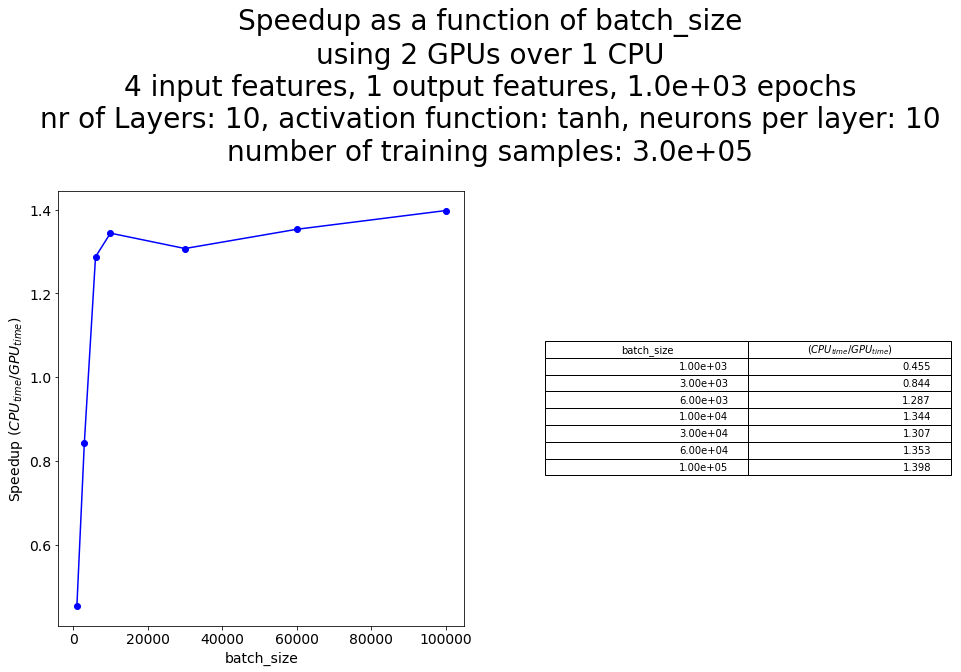

In [64]:
json_info_dict = json_info_dict_gpu
json_data = json_data_gpu
param_string = param_string_gpu
bench_diff = time_array_cpu / time_array_gpu

plot_chars = {'batch_size': 'b-o', 'nr_of_layers': 'b-o', 'activation_functions': 'bo', 'neurons_per_layer': 'b-o', }
param = json_info_dict['tested_parameter']
char_size_multiplier = 7

fig = plt.figure(figsize=(16,8))

ax = plt.subplot(1,2,1)
plt.plot(json_info_dict['tested_values'], bench_diff, plot_chars[param])
xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
plt.xlabel(param, fontsize=2*char_size_multiplier)
plt.ylabel('Speedup $(CPU_{time}/GPU_{time})$', fontsize=2*char_size_multiplier)
#plt.title('Speedup for batch sizes using 2 GPUs over 1 CPU', fontsize=3*char_size_multiplier)
ax.tick_params(axis='both', labelsize=2*char_size_multiplier)

ax = plt.subplot(1,2,2)
collabel=(param, "$(CPU_{time}/GPU_{time})$")
ax.axis('tight')
ax.axis('off')

table_vals = []
for i in range(len(json_info_dict['tested_values'])):
    if type(json_info_dict['tested_values'][i]) is str:
        table_vals.append([json_info_dict['tested_values'][i], '%.3f' % (bench_diff[i])])
    else:
        table_vals.append(['%.2e' % (json_info_dict['tested_values'][i]), '%.3f' % (bench_diff[i])])

the_table = ax.table(cellText=table_vals,colLabels=collabel,loc='center')
the_table.scale(1, 1.4)
    
plt.suptitle('Speedup as a function of ' + param + '\nusing 2 GPUs over 1 CPU\n%d input features, %d output features, %.1e epochs\n' % ( 
    len(json_data[1]['input_features']), len(json_data[1]['output_features']), json_data[1]['number_of_epochs'][0]) + 
    param_string, 
    y=1.2, fontsize=4*char_size_multiplier)
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0.2, hspace=0.5)
#plt.tight_layout()

plt.show()

In [65]:
date_string = datetime.datetime.now().strftime("%Y-%m-%d")
if save_figs:
    fig.savefig(result_dir + 'CPU_2GPU_comparison_' + date_string + '_' + param + '.png', bbox_inches = 'tight')